## Building a Credit Scoring Model for Buy-Now-Pay-Later Services: A Comprehensive Analysis of Credit Risk Classification

## Overview
Credit scoring models are vital tools used by financial institutions to assess the creditworthiness of potential borrowers. As part of risk management, these models predict the likelihood of a borrower defaulting on a loan, which allows institutions to mitigate potential losses. Traditionally, credit scoring models rely on statistical methods to analyze historical data, identifying patterns and relationships between borrower behavior and loan outcomes.

In this challenge, we aim to build a comprehensive credit scoring model for Bati Bank, a leading financial institution collaborating with an eCommerce platform. The goal is to enhance their buy-now-pay-later service, allowing customers to purchase items on credit, based on their predicted creditworthiness. By developing a reliable and robust credit scoring model, Bati Bank can make informed lending decisions while minimizing the risk of defaults. This project involves data exploration, feature engineering, model development, and real-time deployment of the model via an API to assess credit risk and optimize loan terms.

## Objectives
The primary objectives of this project are as follows:

1. Define Credit Risk Proxy: Establish a proxy variable to categorize users as high-risk (bad) or low-risk (good) based on their likelihood of default.

2. Feature Engineering: Select relevant features from the data and engineer new ones that are strong predictors of default risk. This includes creating aggregate and extracted features, encoding categorical variables, handling missing data, and normalizing numerical features.

3. Develop a Credit Risk Model: Build and train machine learning models that assign risk probabilities to new customers based on historical transaction data.

4. Credit Scoring: Use the model's probability estimates to create a credit score for each customer, facilitating quick and accurate creditworthiness assessments.

5. Loan Optimization: Predict the optimal loan amount and duration for new customers, considering their risk profile to ensure sustainable lending practices.

6. Model Deployment: Deploy the trained credit scoring model through an API, enabling real-time credit scoring and decision-making. The API will accept customer transaction data and return predictions on credit risk and loan recommendations.

### Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
df = pd.read_csv('../data/woe_feature_engineering.csv')
df

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,Amount,...,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,Stability,RFMS_Score,Risk_Label,RFMS_Binned
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0.0,5,1,0.092004,...,False,True,False,1.0,0.028851,0.557522,0.000919,0.396823,0,2.0
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0.0,3,19,0.091910,...,True,False,False,1.0,0.028851,0.557522,0.000919,0.396823,0,2.0
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0.0,5,0,0.091958,...,False,True,False,0.0,0.000244,0.556944,0.000000,0.139297,0,0.0
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0.0,0,11,0.093750,...,False,True,False,1.0,0.009046,0.558153,0.005187,0.393097,0,2.0
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0.0,3,19,0.091853,...,True,False,False,1.0,0.009046,0.558153,0.005187,0.393097,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,0.0,3,19,0.091820,...,True,False,False,1.0,0.139853,0.569883,0.006814,0.429138,0,2.0
95658,95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,0.0,5,1,0.092004,...,False,True,False,1.0,0.010269,0.557249,0.000687,0.392051,0,2.0
95659,95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,0.0,3,19,0.091910,...,True,False,False,1.0,0.010269,0.557249,0.000687,0.392051,0,2.0
95660,95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,0.0,5,8,0.092188,...,False,True,False,1.0,0.127873,0.561462,0.000969,0.422576,0,2.0


## 5. Train Test Split

### Separet dependant and independant variable

In [3]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(['TransactionId', 'Risk_Label', 'RFMS_Score', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CountryCode', 'ProviderId','ProductId','FraudResult'], axis=1)  # Drop non-feature columns
y = df['Risk_Label']

### Split the data to training and Testing Set

In [4]:
# Split the data into training and testing sets
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X.columns

Index(['Unnamed: 0', 'Amount', 'Value', 'PricingStrategy', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Deviation_Transaction_Amount',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategory_movies', 'ProductCategory_other',
       'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill',
       'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3',
       'ChannelId_ChannelId_5', 'Recency', 'Frequency', 'Monetary',
       'Stability', 'RFMS_Binned'],
      dtype='object')

In [6]:
print("\nTarget (y):")
y.head()


Target (y):


0    0
1    0
2    0
3    0
4    0
Name: Risk_Label, dtype: int64

### Balancing imbanancd data using SMOTE

In [7]:
# Handle imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)
print("Features (X):")
X.head()

Features (X):


,Unnamed: 0,Amount,Value,PricingStrategy,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Total_Transaction_Amount,Average_Transaction_Amount,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,Stability,RFMS_Binned
0,0,0.092004,0.000101,0.666667,2,15,11,2018,0.557522,0.047184,...,False,False,False,True,False,1.0,0.028851,0.557522,0.000919,2.0
1,1,0.091910,0.000002,0.666667,2,15,11,2018,0.557522,0.047184,...,False,False,True,False,False,1.0,0.028851,0.557522,0.000919,2.0
2,2,0.091958,0.000050,0.666667,2,15,11,2018,0.556944,0.047137,...,False,False,False,True,False,0.0,0.000244,0.556944,0.000000,0.0
3,3,0.093750,0.002206,0.666667,3,15,11,2018,0.558153,0.047749,...,False,True,False,True,False,1.0,0.009046,0.558153,0.005187,2.0
4,4,0.091853,0.000065,0.666667,3,15,11,2018,0.558153,0.047749,...,False,False,True,False,False,1.0,0.009046,0.558153,0.005187,2.0


In [8]:
# # Display the size of the train and test sets
print(f"Training set size: {X_train_res.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 139890 samples
Testing set size: 19133 samples


## 6. Model Training
The following classfication model were selected to build credit score reisk classfication

**A. Logistic Regression**

In [9]:
from sklearn.linear_model import LogisticRegression
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
# Train Logistic Regression
log_reg.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [10]:
# Make predictions
log_reg_preds_test = log_reg.predict(X_test)
log_reg_preds_train = log_reg.predict(X_train_res)

# Get predicted probabilities for the positive class (class 1)
log_reg_proba_train = log_reg.predict_proba(X_train_res)[:, 1]  # Probabilities for class 1
log_reg_proba_test = log_reg.predict_proba(X_test)[:, 1]    # Probabilities for class 1


**B. Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [12]:
# Train Random Forest
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions
rf_preds_train = rf_model.predict(X_train_res)
rf_preds_test = rf_model.predict(X_test)
# Get predicted probabilities for the positive class (class 1)
rf_proba_train = rf_model.predict_proba(X_train_res)[:, 1]  # Probabilities for class 1
rf_proba_test = rf_model.predict_proba(X_test)[:, 1]    # Probabilities for class 1


**C.  XGBoost Classfication Model**

In [14]:
# XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

In [15]:
#  Train the XGBoost model 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [16]:
# Make predictions
xgb_train_pred = xgb_model.predict(X_train_res)
xgb_test_pred = xgb_model.predict(X_test)
# Get predicted probabilities for the positive class (class 1)
xgb_proba_train = xgb_model.predict_proba(X_train_res)[:, 1]  # Probabilities for class 1
xgb_proba_test = xgb_model.predict_proba(X_test)[:, 1]    # Probabilities for class 1


**D. Adaboost**

In [17]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()

In [18]:
# Adaboost
ada_model.fit(X_train_res, y_train_res)

c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [19]:
# AdaBoost predictions
ada_preds_train = ada_model.predict(X_train_res)
ada_preds_test = ada_model.predict(X_test)
# Get predicted probabilities for the positive class (class 1)
ada_proba_train = ada_model.predict_proba(X_train_res)[:, 1]  # Probabilities for class 1
ada_proba_test = ada_model.predict_proba(X_test)[:, 1]    # Probabilities for class 1


**E. Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [21]:
#decision tree
dt_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [22]:
# Decision Tree predictions
dt_preds_train = dt_model.predict(X_train_res)
dt_preds_test = dt_model.predict(X_test)
# Get predicted probabilities for the positive class (class 1)
dt_proba_train = dt_model.predict_proba(X_train_res)[:, 1]  # Probabilities for class 1
dt_proba_test = dt_model.predict_proba(X_test)[:, 1]

### 7. Performance Evaluation

In [23]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    auc,
)

# Define a function to evaluate the model performance
def evaluate_model(y_true, y_preds, y_proba, model_name):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    roc_auc = roc_auc_score(y_true, y_preds)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_preds)}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_preds)
    print(f"Confusion Matrix:\n{cm}\n")
    # Plot confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

### A. Logistic regression model

Logistic Regression Evaluation on Training Set:
Logistic Regression (Train) Performance:
Accuracy: 0.9998
Precision: 0.9997
Recall: 1.0000
F1 Score: 0.9998
ROC-AUC: 0.9998
Confusion Matrix:
[[69923    22]
 [    0 69945]]

Confusion Matrix:
[[69923    22]
 [    0 69945]]



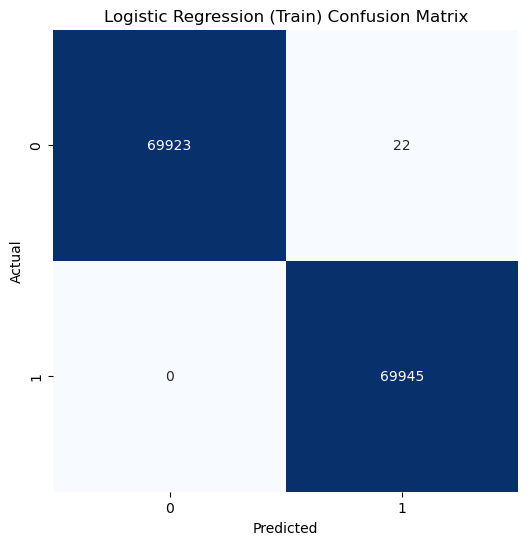

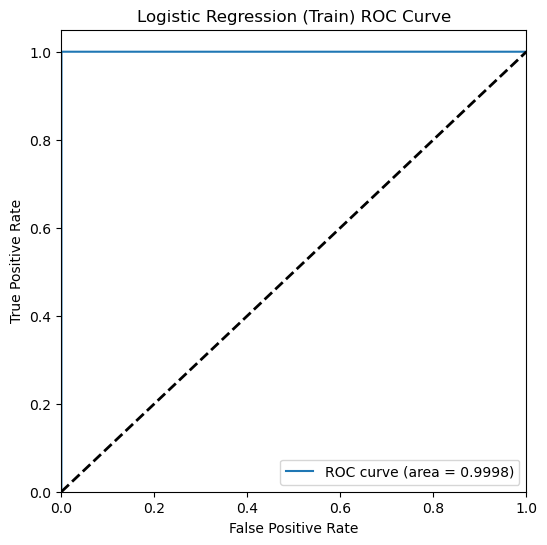

Logistic Regression Evaluation on Testing Set:
Logistic Regression (Test) Performance:
Accuracy: 0.9998
Precision: 0.9982
Recall: 1.0000
F1 Score: 0.9991
ROC-AUC: 0.9999
Confusion Matrix:
[[17476     3]
 [    0  1654]]

Confusion Matrix:
[[17476     3]
 [    0  1654]]



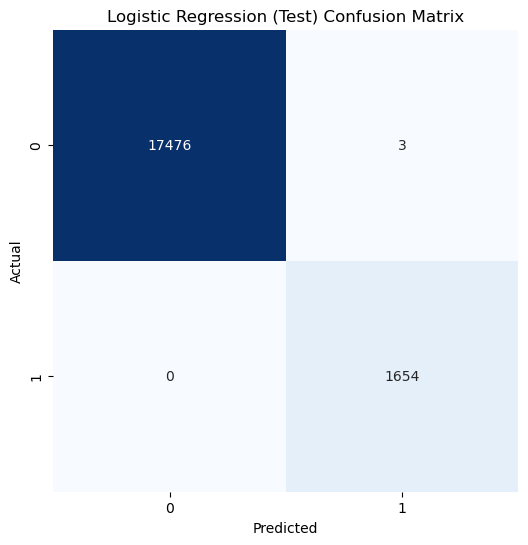

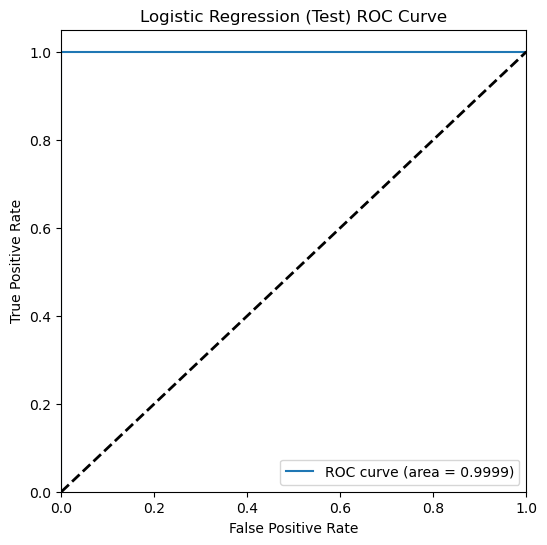

In [24]:
# Evaluate Logistic Regression on training and testing sets
print("Logistic Regression Evaluation on Training Set:")
evaluate_model(y_train_res, log_reg_preds_train, log_reg_proba_train,"Logistic Regression (Train)")
print("Logistic Regression Evaluation on Testing Set:")
evaluate_model(y_test, log_reg_preds_test,log_reg_proba_test, "Logistic Regression (Test)")

### B. Random Forest Model

Random Forest Evaluation on Training Set:
Random Forest (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[69945     0]
 [    0 69945]]

Confusion Matrix:
[[69945     0]
 [    0 69945]]



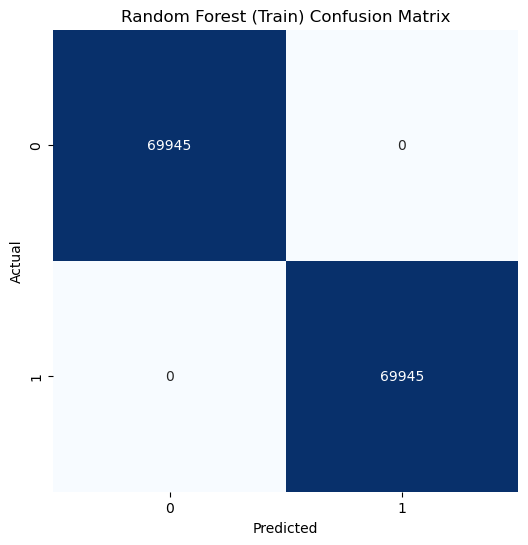

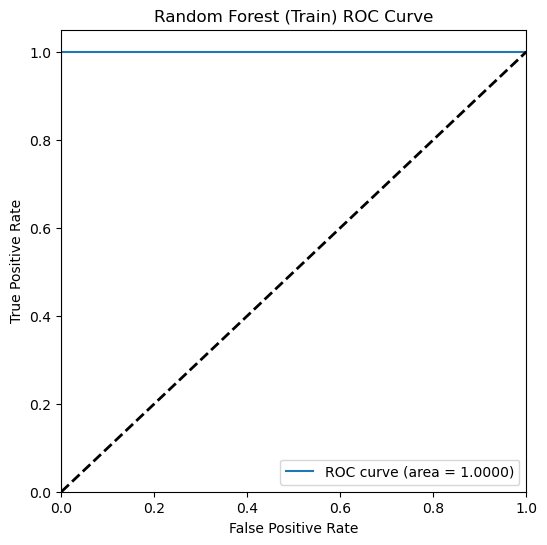

Random Forest Evaluation on Testing Set:
Random Forest (Test) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[17479     0]
 [    0  1654]]

Confusion Matrix:
[[17479     0]
 [    0  1654]]



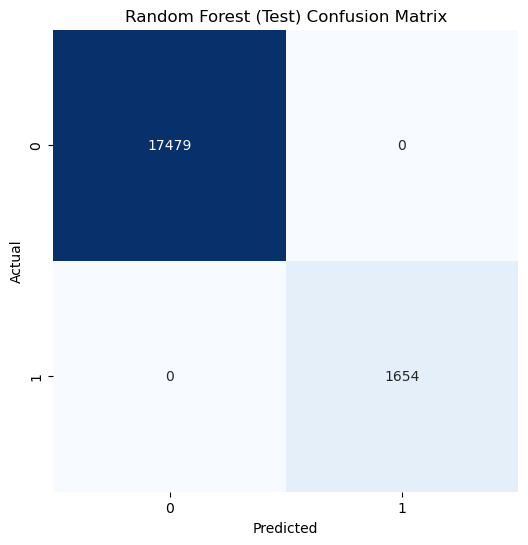

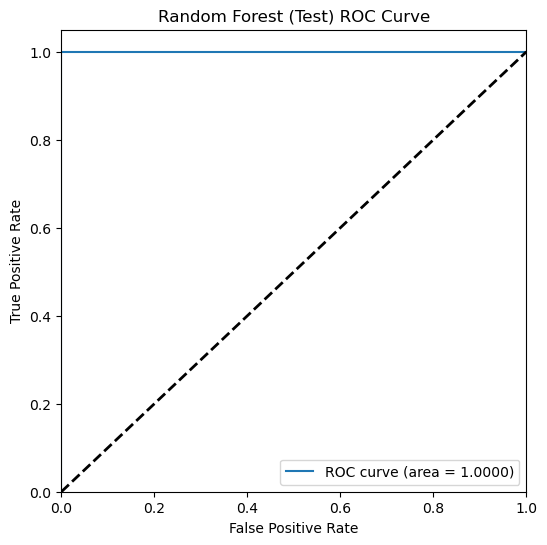

In [25]:
# Evaluate Random Forest on training and testing sets
print("Random Forest Evaluation on Training Set:")
evaluate_model(y_train_res, rf_preds_train, rf_proba_train, "Random Forest (Train)")
print("Random Forest Evaluation on Testing Set:")
evaluate_model(y_test, rf_preds_test, rf_proba_test, "Random Forest (Test)")

### C. XGBoost

XGBoost Evaluation on Training Set:
Xgboost (Train) Performance:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.5000
Confusion Matrix:
[[69945     0]
 [69945     0]]

Confusion Matrix:
[[69945     0]
 [69945     0]]



c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


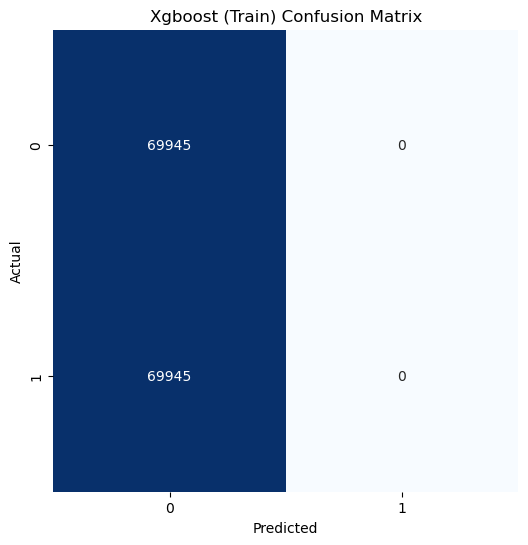

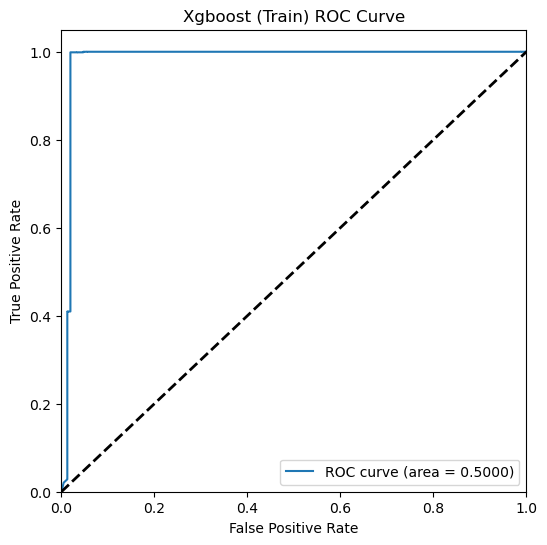

XGboost Evaluation on Testing Set:
XGBoost (Test) Performance:
Accuracy: 0.9136
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.5000
Confusion Matrix:
[[17479     0]
 [ 1654     0]]

Confusion Matrix:
[[17479     0]
 [ 1654     0]]



c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


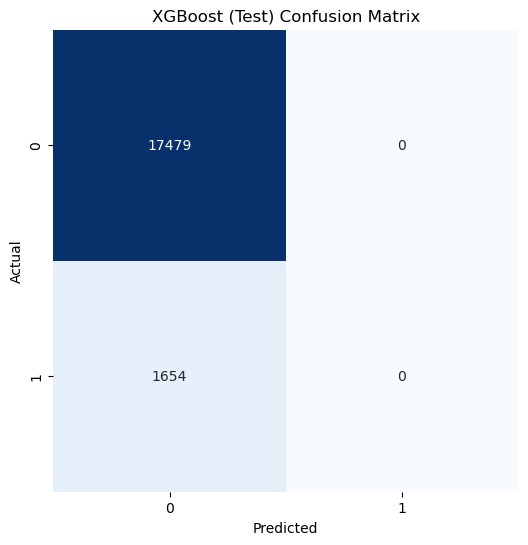

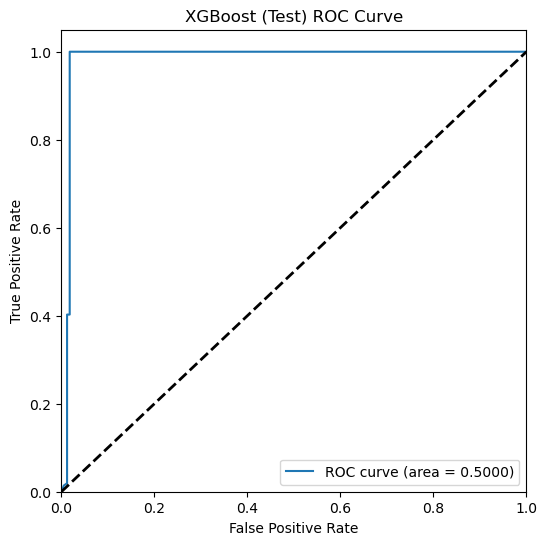

In [26]:
# Evaluate XGBoost on training and testing sets
print("XGBoost Evaluation on Training Set:")
evaluate_model(y_train_res, xgb_train_pred, xgb_proba_train, "Xgboost (Train)")
print("XGboost Evaluation on Testing Set:")
evaluate_model(y_test, xgb_test_pred, xgb_proba_test, "XGBoost (Test)")

### D. Decision Tree evaluation

Decision Tree Evaluation on Training Set:
Decision Tree (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[69945     0]
 [    0 69945]]

Confusion Matrix:
[[69945     0]
 [    0 69945]]



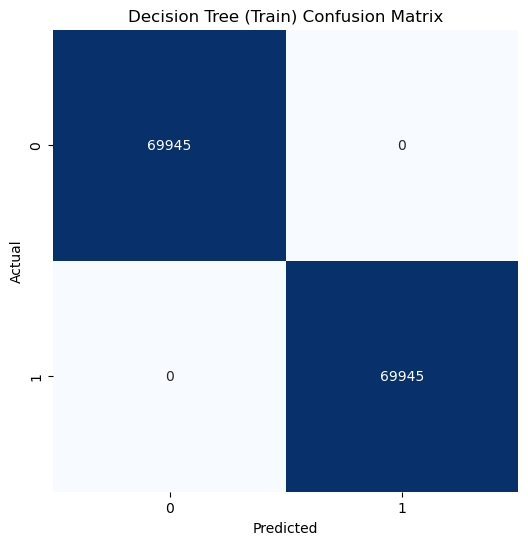

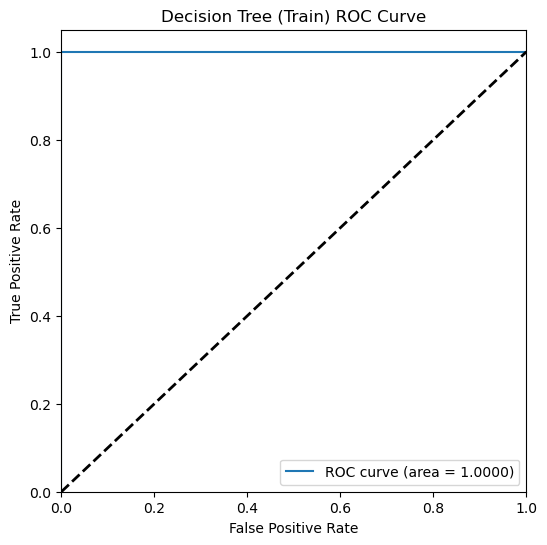

Decision Tree Evaluation on Testing Set:
Decision Tree (Test) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[17479     0]
 [    0  1654]]

Confusion Matrix:
[[17479     0]
 [    0  1654]]



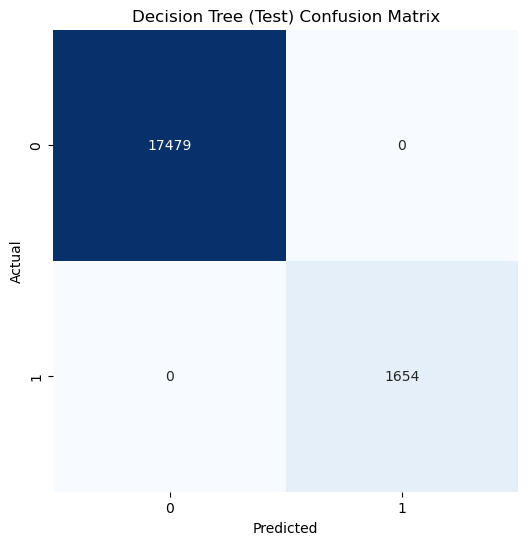

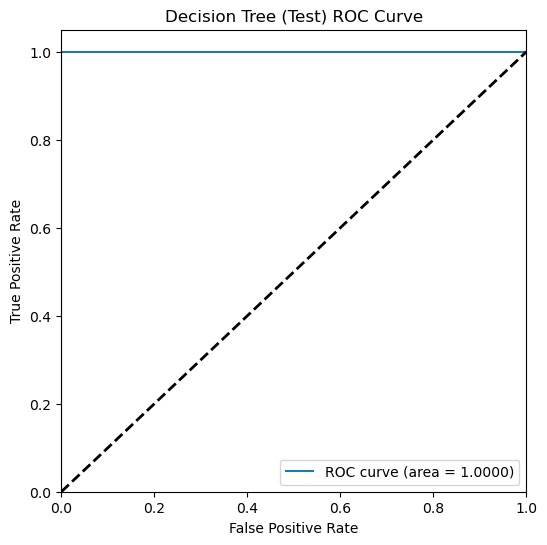

In [27]:
# Decision Tree evaluation
print("Decision Tree Evaluation on Training Set:")
evaluate_model(y_train_res, dt_preds_train,dt_proba_train, "Decision Tree (Train)")
print("Decision Tree Evaluation on Testing Set:")
evaluate_model(y_test, dt_preds_test,dt_proba_test, "Decision Tree (Test)")

### E. AdaBoosting

AdaBoost Evaluation on Training Set:
AdaBoost (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[69945     0]
 [    0 69945]]

Confusion Matrix:
[[69945     0]
 [    0 69945]]



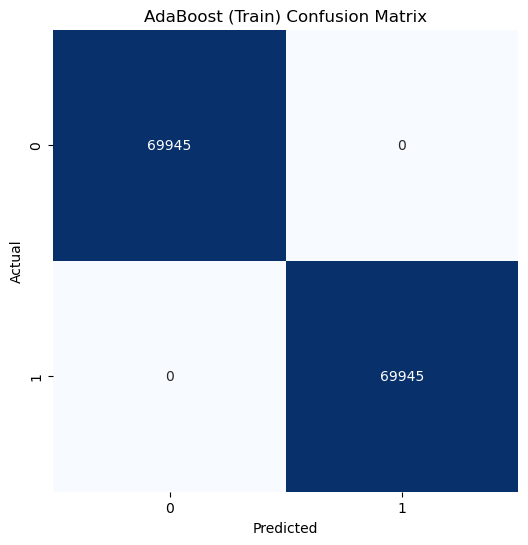

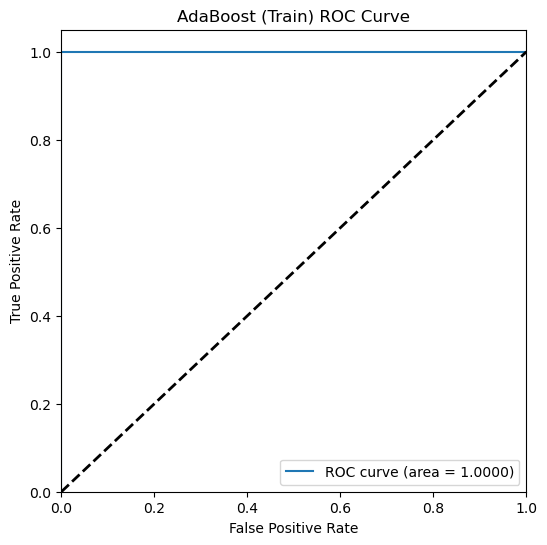

AdaBoost Evaluation on Testing Set:
AdaBoost (Test) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[17479     0]
 [    0  1654]]

Confusion Matrix:
[[17479     0]
 [    0  1654]]



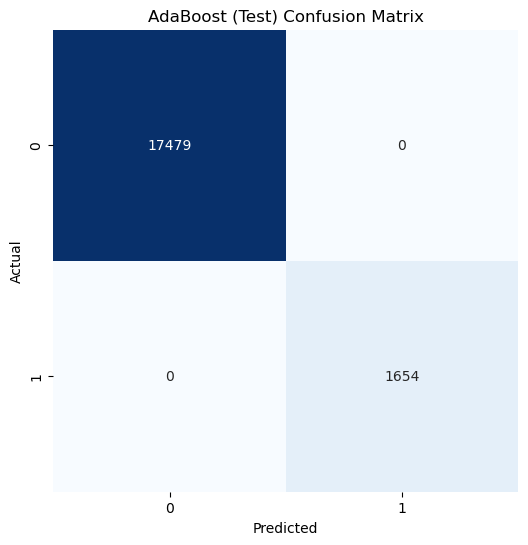

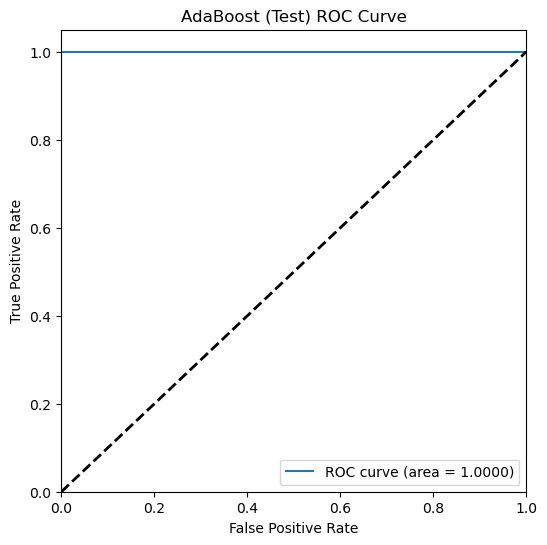

In [28]:
# AdaBoost evaluation
print("AdaBoost Evaluation on Training Set:")
evaluate_model(y_train_res, ada_preds_train,ada_proba_train, "AdaBoost (Train)")
print("AdaBoost Evaluation on Testing Set:")
evaluate_model(y_test, ada_preds_test, ada_proba_test,"AdaBoost (Test)")

In [29]:
import joblib
# Save the models to .pkl files
joblib.dump(log_reg, 'model/logistic_regression_model.pkl')
joblib.dump(rf_model, 'model/random_forest_model.pkl')
joblib.dump(dt_model, 'model/decision_tree_model.pkl')
joblib.dump(ada_model, 'model/adaboost_model.pkl')

print("Models saved as .pkl files.")

Models saved as .pkl files.


## 7. Hyperparameter Tunning

### 7.1 Logistic Regression

In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer

# Hyperparameter Tuning using Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1', verbose=1)

In [31]:
# Best Parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 100, 'solver': 'liblinear'}


In [32]:
# Cross-Validation
cv_accuracy = cross_val_score(best_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
cv_precision = cross_val_score(best_model, X_train_res, y_train_res, cv=5, scoring='precision')
cv_recall = cross_val_score(best_model, X_train_res, y_train_res, cv=5, scoring='recall')
cv_f1 = cross_val_score(best_model, X_train_res, y_train_res, cv=5, scoring='f1')


In [33]:

# Print Fold Results
for fold in range(5):
    print(f"Fold {fold + 1} Results:")
    print(f"Accuracy: {cv_accuracy[fold]:.4f}")
    print(f"Precision: {cv_precision[fold]:.4f}")
    print(f"Recall: {cv_recall[fold]:.4f}")
    print(f"F1 Score: {cv_f1[fold]:.4f}")
    print("-" * 30)

# Overall Cross-Validation Scores
print("Overall Cross-Validation Scores")
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')
print(f'Cross-Validation Precision: {np.mean(cv_precision):.4f}')
print(f'Cross-Validation Recall: {np.mean(cv_recall):.4f}')
print(f'Cross-Validation F1 Score: {np.mean(cv_f1):.4f}')


Fold 1 Results:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 2 Results:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1 Score: 0.9999
------------------------------
Fold 3 Results:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 4 Results:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1 Score: 0.9998
------------------------------
Fold 5 Results:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Overall Cross-Validation Scores
Cross-Validation Accuracy: 0.9999
Cross-Validation Precision: 0.9998
Cross-Validation Recall: 1.0000
Cross-Validation F1 Score: 0.9999


In [34]:
# Evaluate on Test Set
y_pred = best_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Individual Test Scores
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("Logistic Regression Test Score")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17479
           1       1.00      1.00      1.00      1654

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133

Logistic Regression Test Score
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


### 7.2 Random Forest

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [10, 20, 30, None],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
}

rf_model = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='f1', cv=5, verbose=1, n_jobs=-1)

grid_search_rf.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [36]:
# Best Parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [37]:
# Cross-Validation
cv_accuracy = cross_val_score(best_rf_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
cv_precision = cross_val_score(best_rf_model, X_train_res, y_train_res, cv=5, scoring='precision')
cv_recall = cross_val_score(best_rf_model, X_train_res, y_train_res, cv=5, scoring='recall')
cv_f1 = cross_val_score(best_rf_model, X_train_res, y_train_res, cv=5, scoring='f1')

# Print Fold Results
for fold in range(5):
    print(f"Fold {fold + 1} Results:")
    print(f"Accuracy: {cv_accuracy[fold]:.4f}")
    print(f"Precision: {cv_precision[fold]:.4f}")
    print(f"Recall: {cv_recall[fold]:.4f}")
    print(f"F1 Score: {cv_f1[fold]:.4f}")
    print("-" * 30)

# Overall Cross-Validation Scores
print("Overall Cross-Validation Scores")
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')
print(f'Cross-Validation Precision: {np.mean(cv_precision):.4f}')
print(f'Cross-Validation Recall: {np.mean(cv_recall):.4f}')
print(f'Cross-Validation F1 Score: {np.mean(cv_f1):.4f}')

Fold 1 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 2 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 3 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 4 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 5 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Overall Cross-Validation Scores
Cross-Validation Accuracy: 1.0000
Cross-Validation Precision: 1.0000
Cross-Validation Recall: 1.0000
Cross-Validation F1 Score: 1.0000


In [38]:
# Evaluate on Test Set
y_pred_rf = best_rf_model.predict(X_test)

# Classification Report
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_rf))

# Individual Test Scores
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_precision_rf = precision_score(y_test, y_pred_rf)
test_recall_rf = recall_score(y_test, y_pred_rf)
test_f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Test Score")
print(f'Accuracy: {test_accuracy_rf:.4f}')
print(f'Precision: {test_precision_rf:.4f}')
print(f'Recall: {test_recall_rf:.4f}')
print(f'F1 Score: {test_f1_rf:.4f}')

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17479
           1       1.00      1.00      1.00      1654

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133

Random Forest Test Score
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [39]:
import joblib
joblib.dump(best_rf_model, 'model/Tuned_random_forest_model.pkl')
print("Models saved as .pkl files.")

Models saved as .pkl files.


### 7.3 XGBoost

In [40]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'max_depth': [3, 6, 9],                 # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate (shrinkage)
    'subsample': [0.7, 0.8, 1],             # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 1],      # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3],                 # Minimum loss reduction required to make a split
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                               scoring='f1', cv=5, verbose=1, n_jobs=-1)

grid_search_xgb.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:24:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1],
                         'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1]},
             scoring='f1', verbose=1)

In [41]:
# Best Parameters
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_

Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}


In [42]:
# Cross-Validation
cv_accuracy = cross_val_score(best_xgb_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
cv_precision = cross_val_score(best_xgb_model, X_train_res, y_train_res, cv=5, scoring='precision')
cv_recall = cross_val_score(best_xgb_model, X_train_res, y_train_res, cv=5, scoring='recall')
cv_f1 = cross_val_score(best_xgb_model, X_train_res, y_train_res, cv=5, scoring='f1')

# Print Fold Results
for fold in range(5):
    print(f"Fold {fold + 1} Results:")
    print(f"Accuracy: {cv_accuracy[fold]:.4f}")
    print(f"Precision: {cv_precision[fold]:.4f}")
    print(f"Recall: {cv_recall[fold]:.4f}")
    print(f"F1 Score: {cv_f1[fold]:.4f}")
    print("-" * 30)

# Overall Cross-Validation Scores
print("Overall Cross-Validation Scores")
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')
print(f'Cross-Validation Precision: {np.mean(cv_precision):.4f}')
print(f'Cross-Validation Recall: {np.mean(cv_recall):.4f}')
print(f'Cross-Validation F1 Score: {np.mean(cv_f1):.4f}')


c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:24:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:24:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:24:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

Fold 1 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 2 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1 Score: 1.0000
------------------------------
Fold 3 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 4 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Fold 5 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Overall Cross-Validation Scores
Cross-Validation Accuracy: 1.0000
Cross-Validation Precision: 1.0000
Cross-Validation Recall: 1.0000
Cross-Validation F1 Score: 1.0000


In [43]:
# Evaluate on Test Set
y_pred_xgb = best_xgb_model.predict(X_test)

# Classification Report
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_xgb))

# Individual Test Scores
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
test_precision_xgb = precision_score(y_test, y_pred_xgb)
test_recall_xgb = recall_score(y_test, y_pred_xgb)
test_f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Test Score")
print(f'Accuracy: {test_accuracy_xgb:.4f}')
print(f'Precision: {test_precision_xgb:.4f}')
print(f'Recall: {test_recall_xgb:.4f}')
print(f'F1 Score: {test_f1_xgb:.4f}')

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17479
           1       1.00      1.00      1.00      1654

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133

XGBoost Test Score
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [44]:
import joblib
joblib.dump(best_xgb_model, 'model/Tuned_XGBoost_model.pkl')
print("Models saved as .pkl files.")

Models saved as .pkl files.
